# 이변량_숫자 vs 숫자

* 우리가 사용하는 도구는...
    * 두 변수와의 관계를 살펴보기 위해, 두가지 도구(시각화, 수치화)를 이용합니다.
    * 이 도구들도 각각 한계가 있습니다. 보이는게 전부가 아님을 꼭 명심하세요!
    * 특히 수치화 도구(가설검정 도구)는 많은 가정들이 전제 됩니다.
    * 그래서 이번 과정에서는 그 도구를 사용하는 데에 집중합니다.


## 1.환경준비

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> ① 타이타닉 생존자  
② 뉴욕 공기 오염도


In [2]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 뉴욕시 공기 오염도 데이터
air = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv')
air['Date'] = pd.to_datetime(air['Date'])
# air['Month'] = air.Date.dt.month
# air['Weekday'] = air.Date.dt.weekday
air.head()

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05


----

## 2.시각화 : 산점도

* 상관 분석에 대해서 이야기 해봅시다.
    * 상관 분석은 연속형 변수 X에 대한 연속형 변수 Y의 관계를 분석할 때 사용됩니다.
    * Scatter를 통해 시각화 합니다.
* 가설 : 온도(x)가 상승하면 아이스크림 판매량(y)을 증가할까?
    * 어떤 관계가 보이나요?
    * 얼마나 강한 관계인가요?
* 숫자 vs 숫자를 비교할 때 중요한 관점이 ‘직선’ (Linearity)입니다.



<img src='https://github.com/DA4BAM/image/blob/main/%EC%82%B0%EC%A0%90%EB%8F%84_ex.png?raw=true' width=500/>

### (1) 산점도

* 문법
    * plt.scatter( x축 값, y축 값 )
    * plt.scatter( ‘x변수’, ‘y변수’, data = dataframe이름)

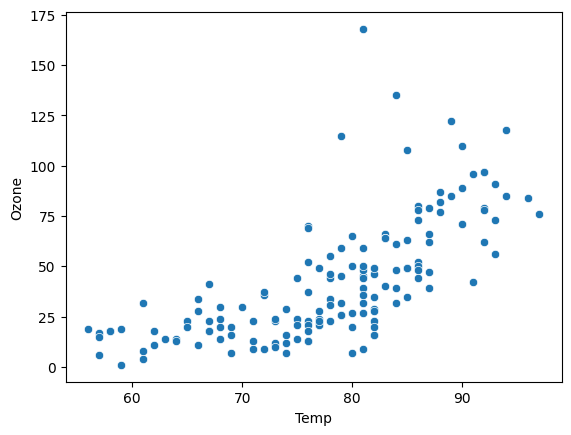

In [4]:
sns.scatterplot(x='Temp', y='Ozone', data = air)
plt.show()

그래프를 그렸으면, 그래프로부터 정보를 파악해야 합니다.  

무엇이 보이나요?

* 유독 오존이 높은 것이 보임(이상값)
* 온도에 따라 온존도 증가하는 것으로 보임
* 온도가 70이후로 기울기가 증가가 보임

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

* [문1] Temp, Wind, Solar.R 과 Ozone 과의 관계를 시각화 해 봅시다.

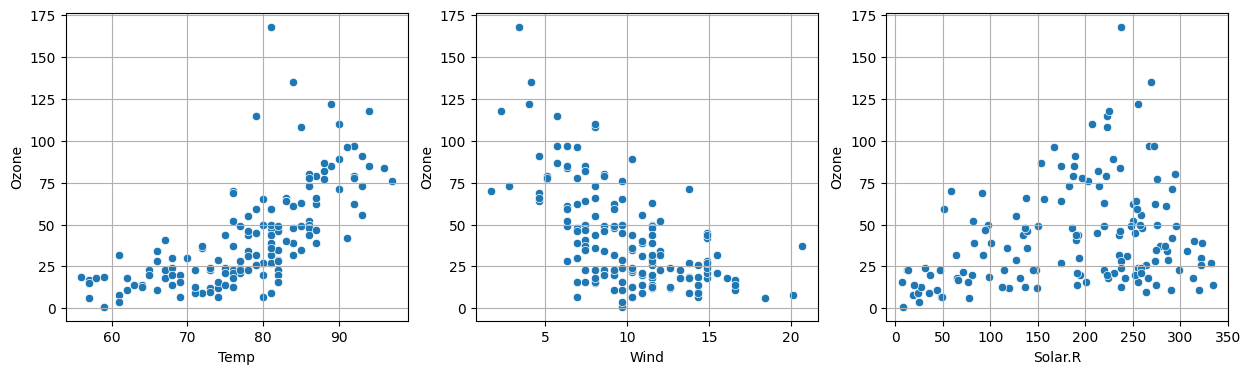

In [5]:
plt.figure(figsize=(15,4))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Temp', y='Ozone', data=air)
plt.grid()

plt.subplot(1, 3, 2)
sns.scatterplot(x='Wind', y='Ozone', data=air)
plt.grid()

plt.subplot(1, 3, 3)
sns.scatterplot(x='Solar.R', y='Ozone', data=air)
plt.grid()

plt.show()

* [문2] Ozone과 가장 강한 관계의 x변수는?

* Temp 변화에 따라 오존이 증가하고 70구간 부터 기울기가 증가
* Wind 변화에 따라 오존이 감소하고 7.5구간 부터 기울기가 완만해짐

* 두 변수의 관계
    * 산점도에서 또렷한 패턴이 보인다면, 강한 관계로 볼 수 있습니다.
    * 특히, 직선의 패턴이 보인다면

<img src='https://cqeacademy.com/wp-content/uploads/2018/06/Scatter-Plots-and-Correlation-Examples.png' width=800/>

### (2) pairplot으로 한꺼번에 시각화 할 수 있습니다.

* 숫자형 변수들에 대한 산점도를 한꺼번에 그려줍니다.
* 그러나 **시간이 많이**걸립니다.

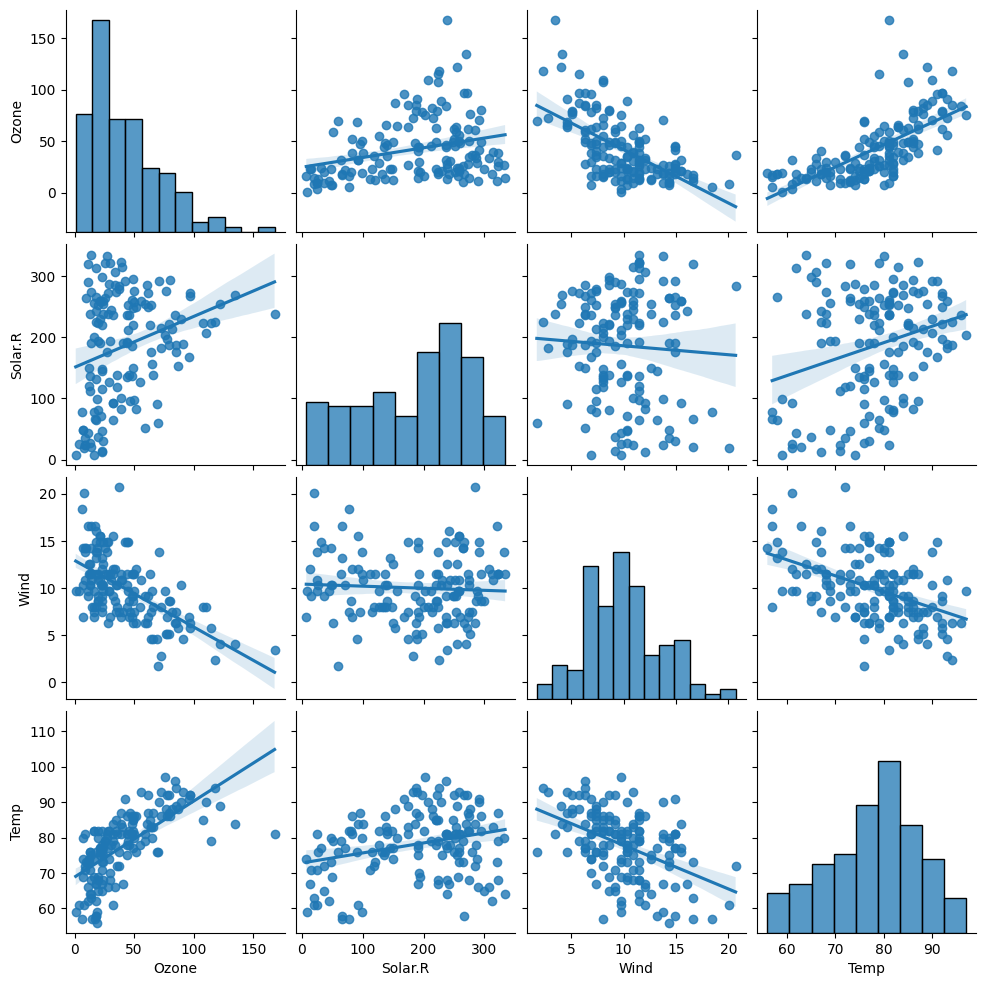

In [6]:
sns.pairplot(air, kind='reg' )
plt.show()

###  (3) (추가) jointplot 로 살펴보기

* jointplot은 산점도와 각각의 히스토그램을 함께 보여줍니다.

* Temp --> Ozone

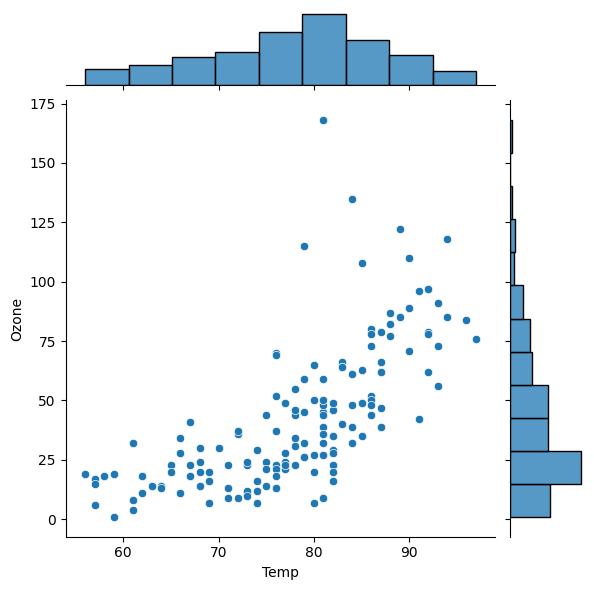

In [7]:
sns.jointplot(x='Temp', y='Ozone', data = air)
plt.show()

* Wind --> Ozone

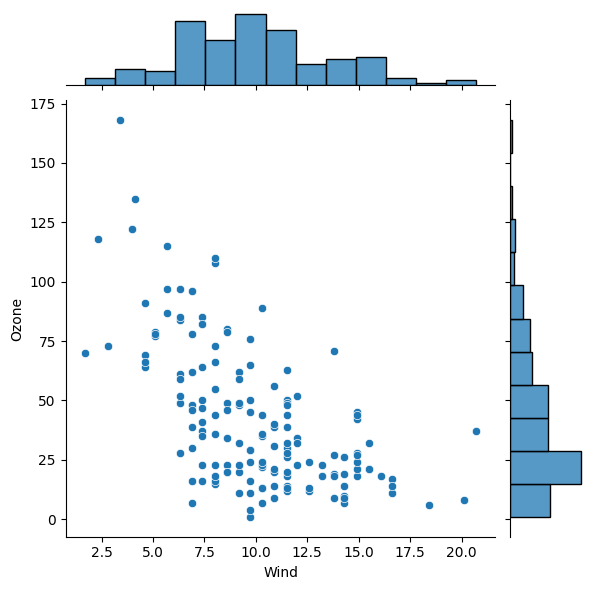

In [8]:
sns.jointplot(x='Wind', y='Ozone', data = air)
plt.show()

* Solar.R --> Ozone

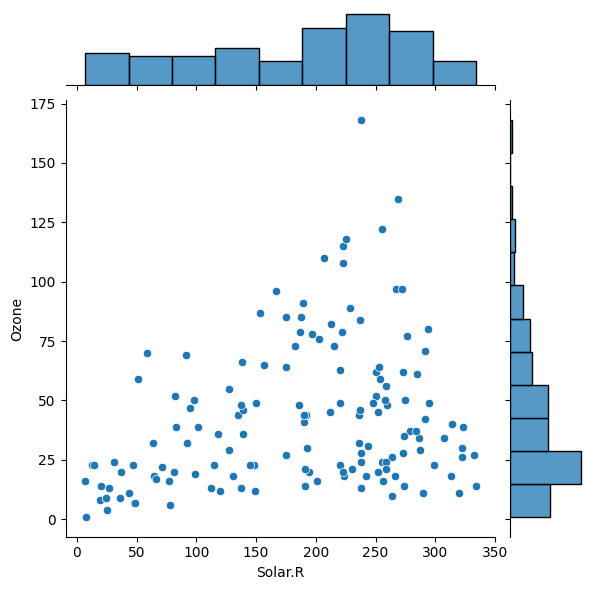

In [9]:
sns.jointplot(x='Solar.R', y='Ozone', data = air)
plt.show()

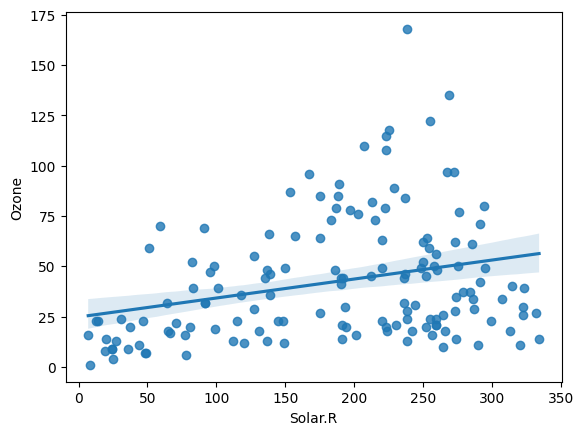

In [10]:
sns.regplot(x='Solar.R', y='Ozone', data = air) # regplot 95% 신뢰구간
plt.show()

## 3.수치화 : 상관분석

### (1) 상관계수, p-value

* 상관계수 𝑟
    * 공분산을 표준화 한 값
    * -1 ~ 1 사이의 값
    * -1, 1에 가까울 수록 강한 상관관계를 나타냄.

* 경험에 의한 대략의 기준(절대적인 기준이 절대 아닙니다.)
    * 강한 : 0.5 < |𝑟| ≤ 1
    * 중간 : 0.2 < |𝑟| ≤ 0.5
    * 약한 : 0.1 < |𝑟| ≤ 0.2
    * (거의)없음 : |𝑟| ≤ 0.1
    

In [11]:
import scipy.stats as spst

In [12]:
# 상관계수와 p-value #pvalue 0에 가까움  # 즉 관계가 있다
spst.pearsonr(air['Temp'], air['Ozone'])
                # 상관대수   # p-Value

PearsonRResult(statistic=0.6833717861490114, pvalue=2.197769800200284e-22)

결과는 튜플로 나오는데

1. 튜플의 첫 번째 값 : 상관계수를 뜻합니다.
2. 두번째 값 : p-value
    * 귀무가설 : 상관 관계가 없다.(상관계수가 0이다.)
    * 대립가설 : 상관 관계가 있다.(상관계수가 0이 아니다.)
3. 주의 사항 : 값에 NaN이 있으면 계산되지 않습니다. 반드시 .notnull()로 제외하고 수행해야 합니다.

### (2) 데이터프레임 한꺼번에 상관계수 구하기

In [13]:
# 데이터프레임으로 부터 수치형 데이터에 대한 상관계수 구하기
air.corr()

,Ozone,Solar.R,Wind,Temp,Date
Ozone,1.000000,0.280068,-0.605478,0.683372,0.170271
Solar.R,0.280068,1.000000,-0.056792,0.275840,-0.104682
Wind,-0.605478,-0.056792,1.000000,-0.457988,-0.168683
Temp,0.683372,0.275840,-0.457988,1.000000,0.385605
Date,0.170271,-0.104682,-0.168683,0.385605,1.000000


위 결과로 부터,
1. 같은 변수끼리 구한 값 1은 의미 없다.
2. 상관계수의 절대값이
    * 1에 가까울 수록 강한 상관관계
    * 0에 가까울 수록 약한 상관관계
3. +는 양의 상관관계, -는 음의 상관관계

### (3) (추가) 상관계수를 heatmap으로 시각화

In [14]:
# seaborn 문제 발생 시 실행
# 커널 restart
!pip install seaborn --upgrade

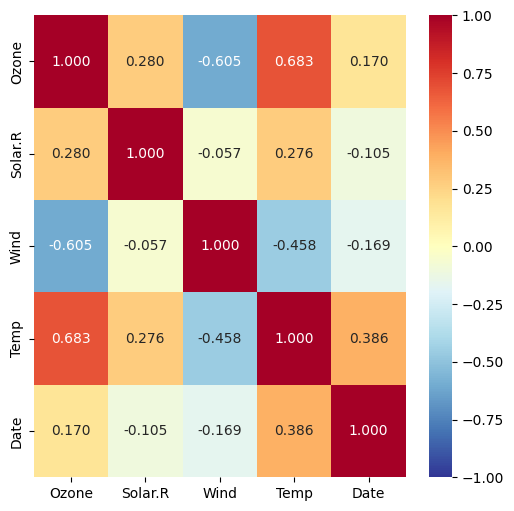

In [15]:
plt.figure(figsize = (6, 6))
#sns.set(font_scale=1.5) # 폰트 조절
sns.heatmap(air.corr(),
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값
plt.show()

칼라를 변경하려면 아래 링크로 가서 color map 을 확인하고 조정하세요.  
cmap(color map) : https://matplotlib.org/stable/tutorials/colors/colormaps.html

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

* 다음의 변수에 대해서 상관분석을 수행하시오.

* [문1] Temp --> Ozone

In [37]:
spst.pearsonr(air['Temp'], air['Ozone'])

PearsonRResult(statistic=0.6833717861490114, pvalue=2.197769800200284e-22)

* [문2] Wind --> Ozone

In [39]:
spst.pearsonr(air['Wind'], air['Ozone'])

PearsonRResult(statistic=-0.6054782354684075, pvalue=1.1255146087637916e-16)

* [문3] Solar.R --> Ozone
    * 단, Solar.R 에는 NaN이 있습니다. NaN을 제외(.notnull())하고, 상관분석을 수행하시오.

In [41]:
#air['Solar.R'].isna().sum()
# NaN값 제거
air_clean = air[air['Solar.R'].notnull()]
spst.pearsonr(air_clean['Solar.R'], air_clean['Ozone'])

PearsonRResult(statistic=0.2800681334905377, pvalue=0.0006175878788566504)

## 4.복습문제

* 보스톤 집값 데이터를 이용하여 다음의 복습문제를 풀어 봅시다.

**변수설명**
> * medv  : 1978 보스턴 주택 가격, 506개 타운의 주택 가격 중앙값 (단위 1,000 달러) <== Target
* crim	범죄율
* zn	25,000 평방피트를 초과 거주지역 비율
* indus	비소매상업지역 면적 비율
* chas	찰스강변 위치(범주 : 강변1, 아니면 0)
* nox	일산화질소 농도
* rm	주택당 방 수
* age	1940년 이전에 건축된 주택의 비율
* dis	직업센터의 거리
* rad	방사형 고속도로까지의 거리
* tax	재산세율
* ptratio	학생/교사 비율
* lstat	인구 중 하위 계층 비율


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

In [1]:
# 보스톤 집값 데이터
boston = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv')
boston.head()

NameError: name 'pd' is not defined

In [19]:
def eda_2_nn(data, feature, target) :
    # 산점도
    temp = data.loc[data[feature].notnull()]
    sns.scatterplot( x= feature, y = target, data = temp)
    plt.grid()
    plt.show()
    result = spst.pearsonr(temp[feature], temp[target])
    print(f'상관계수 : {result[0]}, P-value : {result[1]}')

* 1) crim(범죄율) --> medv(집값) 에 대해 시각화와 수치화(상관분석)을 수행후 관계를 평가하시오.

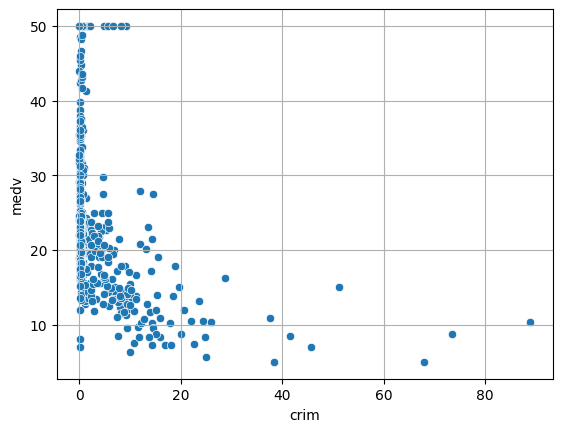

상관계수 : -0.3883046085868116, P-value : 1.1739870821943826e-19


In [20]:
eda_2_nn(boston, 'crim', 'medv')

* 2) tax(제산세율) --> medv(집값) 에 대해 시각화와 수치화(상관분석)을 수행후 관계를 평가하시오.

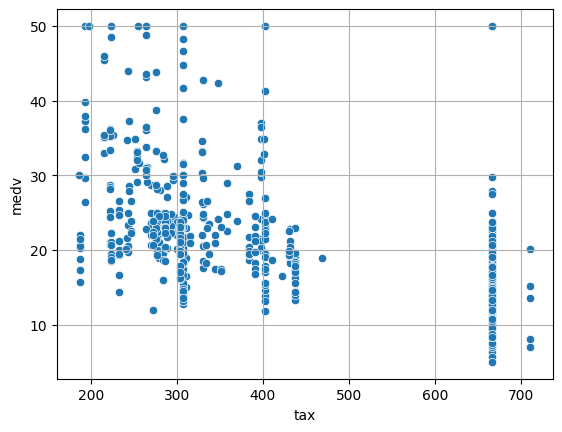

상관계수 : -0.4685359335677671, P-value : 5.637733627690444e-29


In [21]:
eda_2_nn(boston, 'tax', 'medv')

* 3) lstat(하위계층비율) --> medv(집값) 에 대해 시각화와 수치화(상관분석)을 수행후 관계를 평가하시오.

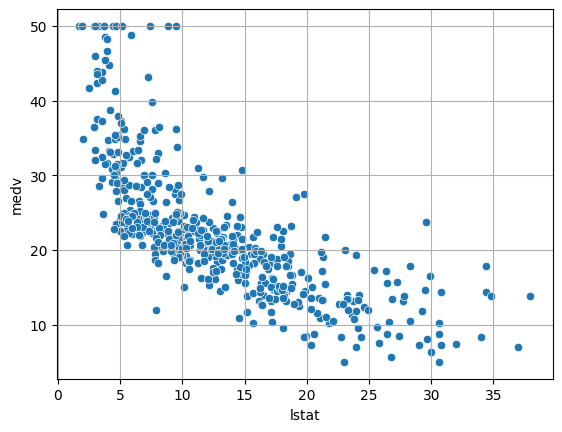

상관계수 : -0.7376627261740148, P-value : 5.081103394387554e-88


In [22]:
eda_2_nn(boston, 'lstat', 'medv')

* 4) ptratio(교사1명당 학생수) --> medv(집값) 에 대해 시각화와 수치화(상관분석)을 수행후 관계를 평가하시오.

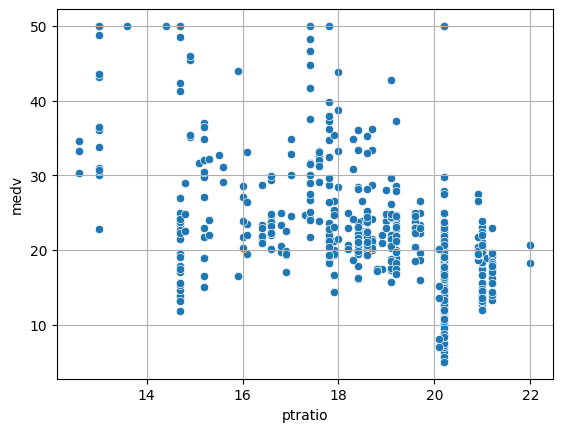

상관계수 : -0.507786685537562, P-value : 1.6095094784727943e-34


In [23]:
eda_2_nn(boston, 'ptratio', 'medv')

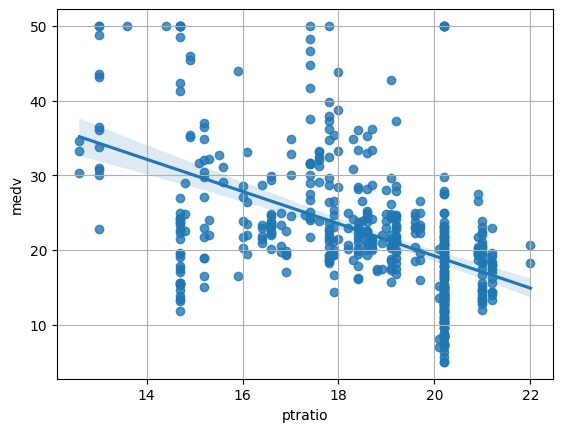

In [26]:
sns.regplot(x='ptratio', y='medv', data=boston)
plt.grid()
plt.show()

* 5) 전체 변수들끼리의 상관계수를 구하고, 가장 강한 상관관계와 가장 약한 상관관계를 찾아 봅시다.

**변수설명**
> * medv  : 1978 보스턴 주택 가격, 506개 타운의 주택 가격 중앙값 (단위 1,000 달러) <== Target
* crim	범죄율
* zn	25,000 평방피트를 초과 거주지역 비율
* indus	비소매상업지역 면적 비율
* chas	찰스강변 위치(범주 : 강변1, 아니면 0)
* nox	일산화질소 농도
* rm	주택당 방 수
* age	1940년 이전에 건축된 주택의 비율
* dis	직업센터의 거리
* rad	방사형 고속도로까지의 거리
* tax	재산세율
* ptratio	학생/교사 비율
* lstat	인구 중 하위 계층 비율


In [56]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


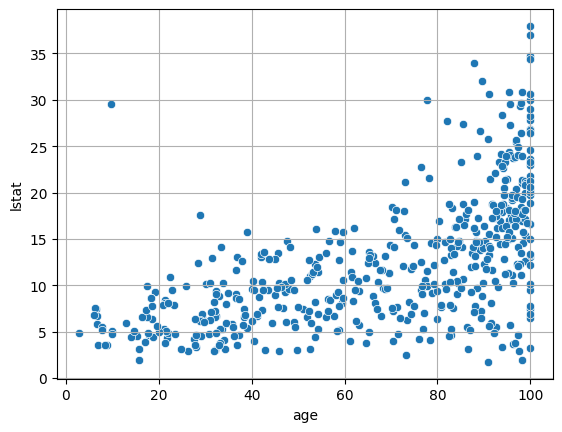

상관계수 : 0.6023385287262399, P-value : 2.783923998501396e-51


In [65]:
eda_2_nn(boston, 'age', 'lstat')

In [31]:
boston.loc[:, boston.corr()['rad'] > 0.7]

,rad,tax
0,1,296
1,2,242
2,2,242
3,3,222
4,3,222
...,...,...
501,1,273
502,1,273
503,1,273
504,1,273
